# __Step 1.1 Pubmed record growth rate__

[PubMed total records by publication year](https://datadiscovery.nlm.nih.gov/dataset/PubMed-total-records-by-publication-year/eds5-ig9r/)

## ___Setup___

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pathlib import Path

In [3]:
# Reproducibility
seed = 20220609

# Setting working directory
proj_dir   = Path.home() / "projects/plant_sci_hist"
work_dir   = proj_dir / "1_obtaining_corpus"
work_dir.mkdir(parents=True, exist_ok=True)

pubmed_rec_num_file = work_dir / "pubmed_record_number.txt"

# So PDF is saved in a format properly
mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "sans-serif"

In [4]:
# Read pubmed record numbers into a dataframe
pubmed_rec_num_df = pd.read_csv(pubmed_rec_num_file, sep='\t')
pubmed_rec_num_df.head()

,Year,NumRecords
0,1951,103821
1,1952,108182
2,1953,108924
3,1954,105942
4,1955,108562


## ___Fit exponential function___

See [this post](https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly), [this](https://stackoverflow.com/questions/21420792/exponential-curve-fitting-in-scipy)

In [5]:
X = pubmed_rec_num_df["Year"]
Y = pubmed_rec_num_df["NumRecords"]

In [6]:
def exp_func(X, a, b, c):
  return a*np.exp(b*X) + c

In [7]:
popt_exp, _ = curve_fit(exp_func, X, Y, p0=(1, 1e-6, 1), maxfev=10000)
popt_exp

array([9.69797803e-41, 5.25679445e-02, 1.01868645e+05])

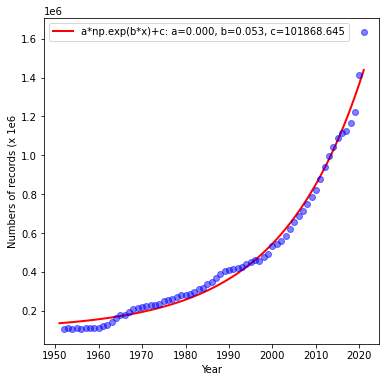

In [11]:
# plotting:
#https://stackoverflow.com/questions/52356128/how-to-set-up-the-initial-value-for-curve-fit-to-find-the-best-optimizing-not-j

# 8/9/23: Not sure why I use lowercase x, y in the code below, changed.
#y_pred = [exp_func(x, *popt_exp) for x in X]
fig_fit_yr_docnum = work_dir / "fig1_1_pubmed_record_growth.pdf"

plt.figure(figsize=(6, 6))
plt.plot(X, exp_func(X, *popt_exp),'r',linewidth=2, 
        label='a*np.exp(b*x)+c: a=%.3f, b=%.3f, c=%.3f' % tuple(popt_exp))
plt.plot(X[1:], Y[1:], 'bo', alpha=0.5)
#plt.plot(x[1:], y_pred[1:], '-b')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Numbers of records (x 1e6)")
plt.savefig(fig_fit_yr_docnum, format='pdf')
plt.show()

## ___Fit double exponential function___

See [this post](https://stackoverflow.com/questions/30356619/how-to-fit-a-two-term-exponential-in-python).
- Did not work, get OptimizeWarning. 

In [68]:
def double_exp_func(X, a, b, c, d):
  return a * np.exp(b * np.exp(c * X)) + d

In [69]:
popt_dexp, _ = curve_fit(double_exp_func, X, Y, p0=(9.69808469e-41,
                                                    5.25679390e-02,
                                                    1,
                                                    1.01868645e+05), 
                                                maxfev=10000)
popt_dexp

/home/shius/miniconda3/envs/bert_finetune/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/shius/miniconda3/envs/bert_finetune/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([9.69808469e-41, 5.25679390e-02, 1.00000000e+00, 1.01868645e+05])

## ___Code dev___

In [56]:
a = np.exp(10)
a, np.log(a)

(22026.465794806718, 10.0)